In [41]:
import matplotlib.pyplot
import skimage.data
import numpy as np
import math
# Reading the image  
img =skimage.io.imread("/home/sneha/Downloads/dog.jpg")


In [42]:
#padding function
def padding(image,size):
    for i in range(size):
        image=np.insert(image, 0,0,axis=0)
        image=np.insert(image,0,image.shape[1],axis=0)
        image=np.insert(image, 0,0,axis=1)
        image=np.insert(image,0,image.shape[0],axis=1)
    return image

In [43]:
#function will give you a filter of specified size
def filters(num_filter,width,height,depth):
    l1_filter = np.random.random_integers(-1,2,size=(num_filter,width,height,depth))
    return l1_filter

In [44]:
#calculating the dimension of output feature map
def out_dimension(image,filters,stride,num_filters):
    r=(image.shape[0])-(filters.shape[1])
    t=(image.shape[1])-(filters.shape[2])
    out_size_x= int(math.floor(r/stride))+1
    out_size_y= int(math.floor(t/stride))+1
    out=np.zeros((out_size_x,out_size_y,num_fil))
    return out

In [45]:
def relu(feature_map):
    #Preparing the output of the ReLU activation function.  
    relu_out = np.zeros(feature_map.shape)
    for k in range(feature_map.shape[2]):
        for r in range(0,feature_map.shape[0]):  
            for c in range(0, feature_map.shape[1]):  
                relu_out[r][c][k] = max(feature_map[r][c][k], 0)  
    return relu_out

In [46]:
#convolving the filter over image and generating the output feature map
def convolution(image,filters,stride,pad_size,activation,num_fil):
        image= padding(image,pad_size)
        out_dim= out_dimension(image,filters,stride,num_fil)
        for k in range(num_fil):
            count_i=0
            for i in range(0,out_dim.shape[0]):
                count_j=0
                for j in range(0,out_dim.shape[1]):
                    temp=image[i+count_i:(i+filters[0].shape[0]+count_i),j+count_j:j+(filters[0].shape[0]+count_j),:]
                    temp_1=np.multiply(temp,filters[k])
                    temp_1=temp_1.reshape(-1)
                    z=np.sum(temp_1)
                    out_dim[i][j][k]=z
                    count_j=count_j+stride-1
                count_i=count_i+stride-1
        if(activation=='relu'):
            out= relu(out_dim)
            return out

In [47]:
def pooling( relu_out, stride_size, pool_mat ):
    pool= out_dimension(relu_out[:,:,0],pool_mat,stride_size,num_fil)
    for k in range(relu_out.shape[2]):
        count_i=0
        for i in range(0,pool.shape[0]):
            count_j=0
            for j in range(0,pool.shape[1]):
                temp=relu_out[:,:,k][i+count_i:(i+(pool_mat.shape[1])+count_i),j+count_j:(j+(pool_mat.shape[1])+count_j)]
                temp_1=np.multiply(temp,pool_mat)
                temp_1=temp_1.reshape(-1)
                z=np.amax(temp_1)
                pool[i][j][k]=z
                count_j=count_j+stride_size-1
            count_i=count_i+stride_size-1
    return pool



In [48]:
num_of_convolution=2
li=[]
image=img
for i in range(num_of_convolution):
     li.append({})
li[0]['num_ker']=2
li[0]['ker_size']=3
li[0]['pad_size']=3
li[0]['stride_size']=2
li[0]['pool_stride']=2
li[0]['pool_size']=2
li[0]['activation']='relu'
li[1]['num_ker']=2
li[1]['ker_size']=3
li[1]['pad_size']=3
li[1]['stride_size']=2
li[1]['pool_stride']=2
li[1]['pool_size']=2
li[1]['activation']='relu'

In [49]:
def composition_of_kernal_layer(image, num_of_convolution, li):
    for i in range(num_of_convolution):
        print('output of '+str(i+1)+" convolution is")
        fil=filters(li[i]['num_ker'],li[i]['ker_size'],li[i]['ker_size'],image.shape[2])
        stride=li[i]['stride_size']
        pad_size=li[i]['pad_size']
        activation=li[i]['activation']
        num_fil=li[i]['num_ker']
        pool_size=li[i]['pool_size']
        pool_stride=li[i]['pool_stride']
        out_dim= convolution(image,fil,stride,pad_size,activation,num_fil)
        print(out_dim.shape)
        pool_mat= np.ones((1,pool_size,pool_size,1))
        p= pooling(out_dim,pool_stride,pool_mat)
        image=p
        print(p.shape)
        for l in range(p.shape[2]):
            matplotlib.pyplot.imshow(p[:,:,l])
            matplotlib.pyplot.show()

output of 1 convolution is


/home/sneha/miniconda3/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(-1, 2 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


(172, 229, 2)
(86, 114, 2)


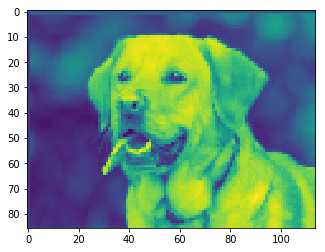

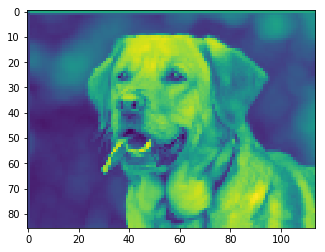

output of 2 convolution is
(45, 59, 2)
(22, 29, 2)


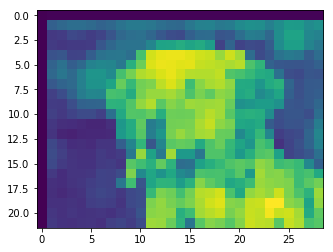

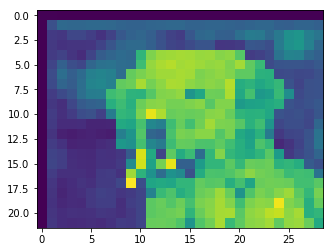

In [50]:
image=img
if __name__ == "__main__":
    composition_of_kernal_layer(image,num_of_convolution,li)
        
        